In [36]:
import numpy as np 
import pygad

In [37]:
data_inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
data_outputs = np.array([[0],[1],[1],[0]])
num_inputs = data_inputs.shape[1]

In [39]:
from pygad import nn 
import pygad.gann

num_solutions = 6
GANN_instance = pygad.gann.GANN(num_solutions=num_solutions,
                                num_neurons_input=num_inputs,
                                num_neurons_hidden_layers=[2],
                                num_neurons_output=2,
                                hidden_activations=["relu"],
                                output_activation="softmax")

In [40]:
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

In [41]:
def fitness_function(solution,sol_idx):
    global GANN_instance,data_inputs,data_outputs 
    predictions = nn.predict(last_layer=GANN_instance.population_networks[sol_idx],
                             data_inputs=data_inputs)
    correct_predictions = np.where(predictions == data_outputs)[0].size
    solution_fitness =  (correct_predictions/data_outputs.size)*100
    return solution_fitness

In [42]:
def callback_func(ga_instance):
    global GANN_instance
    population_matrices = pygad.gann.population_as_matrices(population_vectors=ga_instance.population,population_networks=GANN_instance.population_networks)
    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)
    print("Gen: {generation} - Fitness: {fitness}".format(generation=ga_instance.generations_completed,fitness=ga_instance.best_solution()[1]))

In [43]:
init_pop = population_vectors.copy()
num_parents_mat = 4 
num_generations = 500
mutation_percent_genes = 5
parent_selection_type = "sss"
crossover_type = "single_point"
mutation_type = "random"
keep_parents = 1
init_range_low = -1
init_range_high = 5
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mat,
                       initial_population=init_pop,
                       fitness_func=fitness_function,
                       mutation_percent_genes=mutation_percent_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       keep_parents=keep_parents,
                       on_generation=callback_func)


c:\Users\anisr\.julia\conda\3\envs\dl\lib\site-packages\pygad\pygad.py:522: UserWarning: The percentage of genes to mutate (mutation_percent_genes=5) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


In [44]:
ga_instance.run()

Gen: 1 - Fitness: 200.0
Gen: 2 - Fitness: 200.0
Gen: 3 - Fitness: 200.0
Gen: 4 - Fitness: 200.0
Gen: 5 - Fitness: 200.0
Gen: 6 - Fitness: 200.0
Gen: 7 - Fitness: 200.0
Gen: 8 - Fitness: 200.0
Gen: 9 - Fitness: 200.0
Gen: 10 - Fitness: 200.0
Gen: 11 - Fitness: 200.0
Gen: 12 - Fitness: 200.0
Gen: 13 - Fitness: 200.0
Gen: 14 - Fitness: 200.0
Gen: 15 - Fitness: 200.0
Gen: 16 - Fitness: 200.0
Gen: 17 - Fitness: 200.0
Gen: 18 - Fitness: 200.0
Gen: 19 - Fitness: 200.0
Gen: 20 - Fitness: 200.0
Gen: 21 - Fitness: 200.0
Gen: 22 - Fitness: 200.0
Gen: 23 - Fitness: 200.0
Gen: 24 - Fitness: 200.0
Gen: 25 - Fitness: 200.0
Gen: 26 - Fitness: 200.0
Gen: 27 - Fitness: 200.0
Gen: 28 - Fitness: 200.0
Gen: 29 - Fitness: 200.0
Gen: 30 - Fitness: 200.0
Gen: 31 - Fitness: 200.0
Gen: 32 - Fitness: 200.0
Gen: 33 - Fitness: 200.0
Gen: 34 - Fitness: 200.0
Gen: 35 - Fitness: 200.0
Gen: 36 - Fitness: 200.0
Gen: 37 - Fitness: 200.0
Gen: 38 - Fitness: 200.0
Gen: 39 - Fitness: 200.0
Gen: 40 - Fitness: 200.0
Gen: 41 -

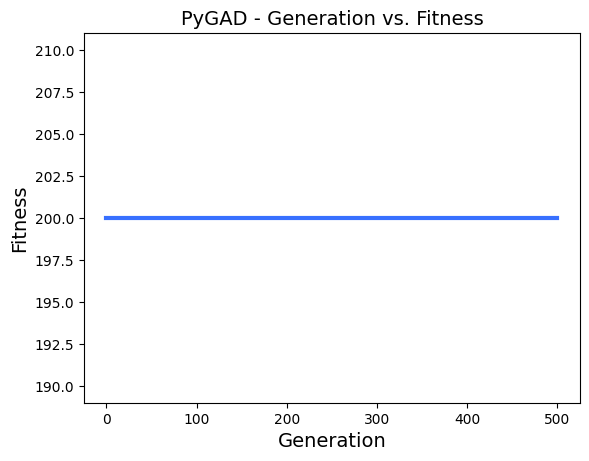

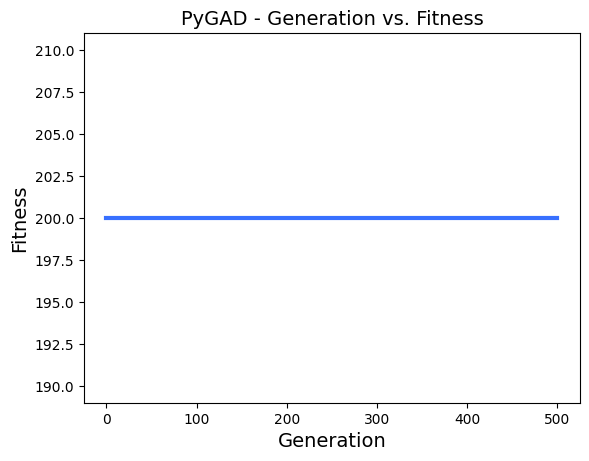

In [45]:
ga_instance.plot_fitness()

In [46]:
solution,sol_fitness,sol_idx = ga_instance.best_solution()
print("Best solution : {solution}".format(solution=solution))
print("Best solution fitness : {solution_fitness}".format(solution_fitness=sol_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=sol_idx))

Best solution : [-2.70917851 -4.92299195 -2.5581967   2.6452625   7.73551694 -2.49504268
  5.18450619 -1.78082831]
Best solution fitness : 200.0
Index of the best solution : 0


In [47]:
if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

Best fitness value reached after 0 generations.


In [48]:
predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],data_inputs=data_inputs)
print("Predictions of the trained network: ",predictions)

Predictions of the trained network:  [0, 0, 1, 0]


In [51]:
num_wrong = np.where(predictions != data_outputs)[0]
print("wrong predictions : {num_wrong}".format(num_wrong=num_wrong.size))

wrong predictions : 8


In [52]:
num_correct = num_wrong.size-data_outputs.size
accuracy = (num_correct/data_outputs.size)*100
print("Accuracy of the best solution : {accuracy} %".format(accuracy=accuracy))

Accuracy of the best solution : 100.0 %


-4